In [6]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [7]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv')

In [9]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


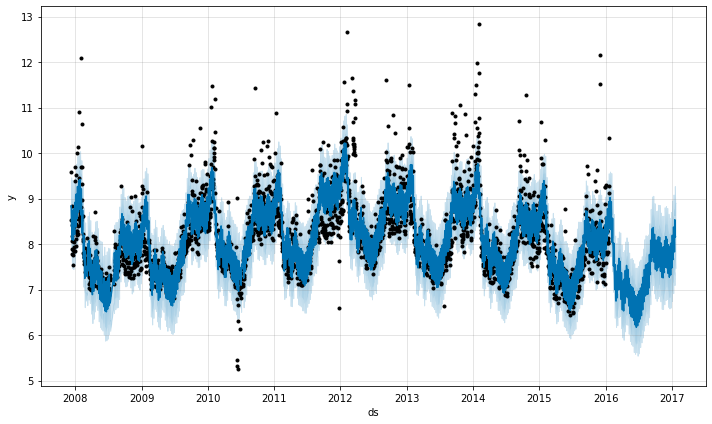

In [14]:
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)


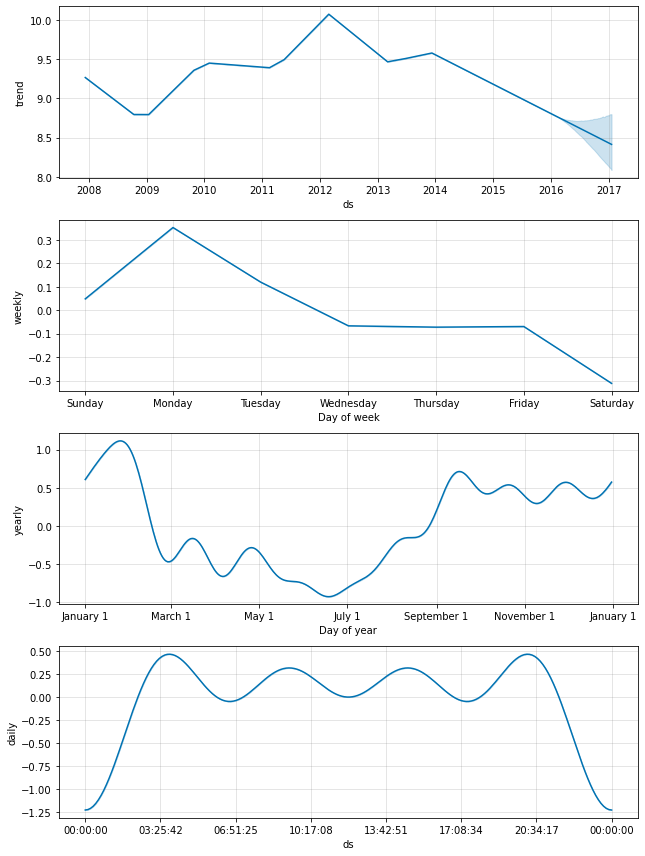

In [15]:
fig2 = m.plot_components(forecast)